# Sales Analysis

#### Import libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Merge data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### **Clean up the data!**

- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to\_numeric, to\_datetime, astype)

##### Drop rows of NAN

In [5]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##### Get rid of text in order date column

In [7]:
# Because of merging all files, headers of each file are in the merged file
all_data[all_data['Order Date'].str[0:2] =='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Remove those headers
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

##### Correct columns type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### **Augment data with additional columns**

##### Add year, month column

In [11]:
all_data['Year'] = pd.to_datetime(all_data['Order Date']).dt.year
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019,4


In [12]:
all_data['Year'].unique()

array([2019, 2020], dtype=int64)

In [13]:
all_data = all_data[all_data['Year'] != 2020]

##### Add month column (alternative method)

In [14]:
#all_data['Month'] = all_data['Order Date'].str[0:2]
#all_data['Month'] = all_data['Month'].astype('int32')
#all_data.head()

##### Add city column

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019,4,Los Angeles (CA)


## Data Exploration!

In [16]:
# Set Color
plt.style.use('seaborn-pastel')

#### Question 1: What was the best month for sales? How much was earned that month? 

In [17]:
# Create Sales Column = Quantity Ordered * Price Each
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),11.99


In [18]:
# Pivot Sales Value (can use groupy().sum())
pivot_sale = pd.pivot_table(all_data, values = 'Sales', index = 'Month',
                                 aggfunc = np.sum, fill_value = 0).reset_index()
pivot_sale

,Month,Sales
0,1,1813586.44
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [39]:
# Alternative method
all_data.groupby(['Month'])['Sales'].sum()

Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

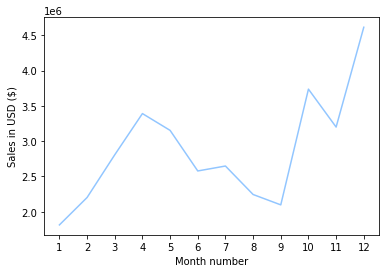

In [19]:
# Plot Sales over Months
months = range(1,13)
#print(months)

plt.plot(months, pivot_sale['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

As can be seen from graph, Sales peaked at about 3.5m at summer, then went down to 2.1m at Sep., before a huge increase to 4m6 at Dec.

In [20]:
#all_data.groupby(['Month']).sum()

#### Question 2: What city sold the most product?

In [21]:
pivot_city = pd.pivot_table(all_data, values = 'Sales', index = 'City',
                                 aggfunc = np.sum, fill_value = 0).reset_index()
pivot_city = pivot_city.sort_values(by = 'Sales', ascending=False)
pivot_city

,City,Sales
8,San Francisco (CA),8259719.03
4,Los Angeles (CA),5451570.81
5,New York City (NY),4662976.81
2,Boston (MA),3660315.12
0,Atlanta (GA),2795498.58
3,Dallas (TX),2766260.45
9,Seattle (WA),2747605.49
7,Portland (OR),1870579.35
1,Austin (TX),1819081.77
6,Portland (ME),449758.27


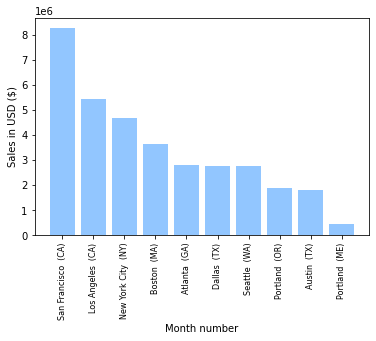

In [22]:
plt.bar(pivot_city['City'], pivot_city['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.xticks(pivot_city['City'], rotation='vertical', size=8)
plt.show()

San Francisco has the most Sales of all at about 8.3m.

In [23]:
#all_data.groupby(['City']).sum()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [24]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019,4,Los Angeles (CA),11.99,9,27,1


In [25]:
pivot_time = pd.pivot_table(all_data, values = 'Count', index = 'Hour',
                                 aggfunc = np.sum, fill_value = 0).reset_index()
#pivot_time

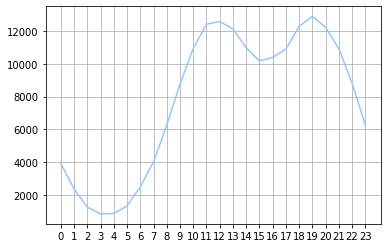

In [26]:
hour = range(0,24)

plt.plot(hour, pivot_time['Count'])
plt.xticks(hour)
plt.grid()
plt.show()

# My recommendation is about 12am or 7pm

#### Question 4: What products are most often sold together?

In [27]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_9380/3772502071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [28]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Top 1 and 2 are not much different which are iPhone and Google Chrome bought with their Charging Cable.

#### Question 5: What product sold the most? Why do you think it sold the most?

In [29]:
pivot_product = pd.pivot_table(all_data, values = 'Quantity Ordered', index = 'Product',
                                 aggfunc = np.sum, fill_value = 0).reset_index()
pivot_product = pivot_product.sort_values(by = 'Quantity Ordered', ascending = False)
pivot_product

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553
6,Apple Airpods Headphones,15657
7,Bose SoundSport Headphones,13454
2,27in FHD Monitor,7547
18,iPhone,6847
1,27in 4K Gaming Monitor,6243


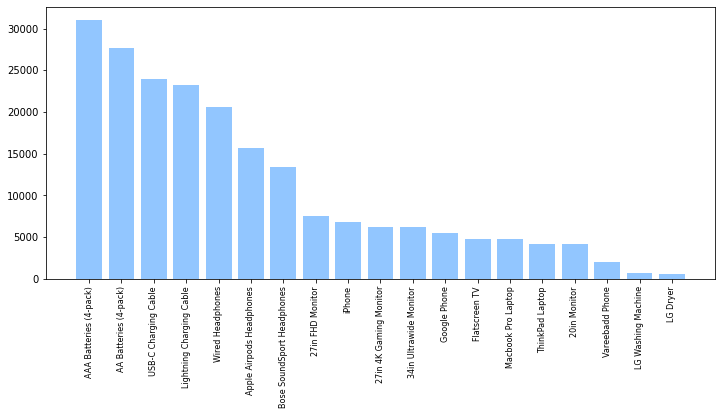

In [30]:
figure = plt.figure(figsize = (12,5))
plt.bar(pivot_product['Product'], pivot_product['Quantity Ordered'])
plt.xticks(pivot_product['Product'], rotation='vertical', size=8)
plt.show()

In [31]:
pivot_product2 = pd.pivot_table(all_data, values = ['Quantity Ordered', 'Price Each'], index = 'Product',
                                 aggfunc = {'Quantity Ordered': np.sum, 'Price Each': np.mean}, fill_value = 0).reset_index()
pivot_product2 = pivot_product2.sort_values(by = 'Quantity Ordered', ascending = False)
pivot_product2

,Product,Price Each,Quantity Ordered
5,AAA Batteries (4-pack),2.99,31012
4,AA Batteries (4-pack),3.84,27635
15,USB-C Charging Cable,11.95,23971
12,Lightning Charging Cable,14.95,23211
17,Wired Headphones,11.99,20553
6,Apple Airpods Headphones,150.00,15657
7,Bose SoundSport Headphones,99.99,13454
2,27in FHD Monitor,149.99,7547
18,iPhone,700.00,6847
1,27in 4K Gaming Monitor,389.99,6243


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_9380/174406449.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pivot_product2['Product'], rotation='vertical', size=8)


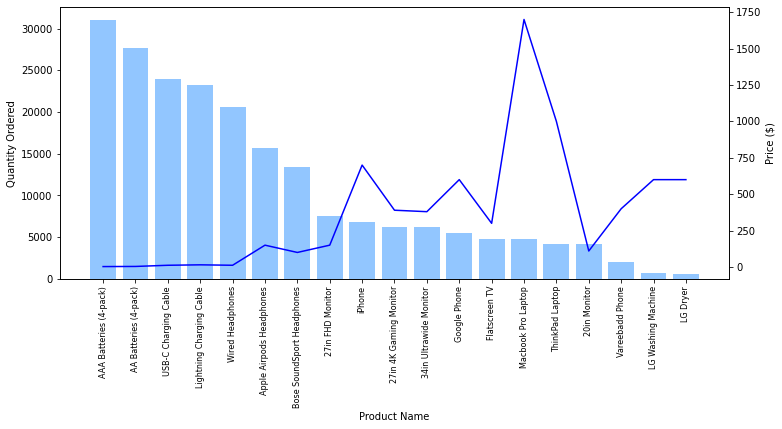

In [34]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots(figsize = (12,5))

ax2 = ax1.twinx()
ax1.bar(pivot_product2['Product'], pivot_product2['Quantity Ordered'])
ax2.plot(pivot_product2['Product'], pivot_product2['Price Each'], c = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_xticklabels(pivot_product2['Product'], rotation='vertical', size=8)

plt.show()

Top 2 is Battery, then Charging Cable at top 3 and 4. Also, as their price are the lowest, this is understandable.